<a href="https://colab.research.google.com/github/anabetenama/fsi/blob/master/Pract2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2
###Clasificación de un dataset de flores con 5 clases
Tras ejecutar el código base, hemos modificado los hiperparámetros de la siguiente formas:
- Añadir una capa convolutiva de 32
- Cambiar el optimizer a "adam"
- Aumentar el número de épocas a 25

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

train  validation


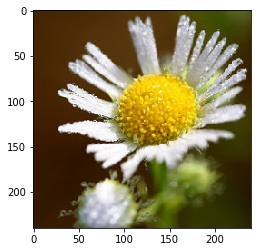

In [2]:
!ls "/content/drive/My Drive/FSIpract/dataset"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/FSIpract/dataset/train/daisy/2838487505_6c3b48efa5_m.jpg', 'r')
imshow(np.asarray(pil_im))


Using TensorFlow backend.


Found 3481 images belonging to 5 classes.
Found 866 images belonging to 5 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
100/100 [==============================] - 115s 1s/step - loss: 1.4562 - acc: 0.3385 - val_loss: 1.2515 - val_acc: 0.4873
Epoch 2/25
100/100 [==============================] - 114s 1s/step - loss: 1.2567 - acc: 0.4500 - val_loss: 1.0760 - val_acc: 0.5373
Epoch 3/25
100/100 [==============================] - 111s 1s/step - loss: 1.1716 - acc: 0.5215 - val_loss: 1.0328 - val_acc: 0.6029
Epoch 4/25
100/100 [==============================] - 111s 1s/step - loss: 1.0798 - acc: 0.5720 - val_loss: 0.9735 - val_acc: 0.6046
Epoch 5/25
100/100 [==============================] - 113s 1s/step - loss: 1.0276 - acc: 0.6120 - val_loss: 1.0785 - val_acc: 0.5626
Epoch 6/25
100/10

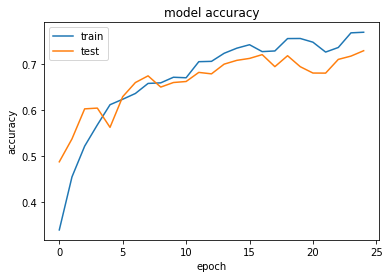

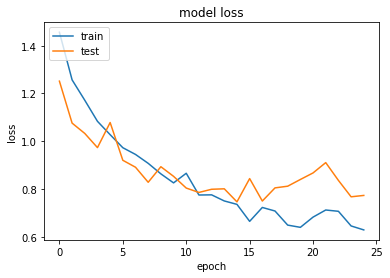

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
import matplotlib.pyplot as plt


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/FSIpract/dataset/train'
validation_data_dir = '/content/drive/My Drive/FSIpract/dataset/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 25

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=800,
)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()